# Análisis de Ciclovias en la Ciudad de Buenos Aires

## Configuración del entorno

In [1]:
#Librerias
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Cargar el archivo CSV especificando el delimitador
file_path = 'Data/ciclovias_WGS84.csv'  
data = pd.read_csv(file_path, delimiter=';', encoding='utf-8')

## Exploración

In [3]:
data.head()

,ID,NOMBRE,TIPO_C,COMUNA,BARRIO,CATEGORIA,TIPOLOGIA,LONG,FECHA,LIM_COM,LIM_BARRIO
0,0,"GONZALEZ, ELPIDIO",CALLE,COMUNA 10,MONTECASTRO,CICLOVIA,BIDIRECCIONAL,"1,57445561287",2017,NO SE ENCUENTRA EN UN LIMITE ENTRE COMUNAS,NO SE ENCUENTRA EN UN LIMITE ENTRE BARRIOS
1,1,DEAN FUNES,CALLE,COMUNA 3,SAN CRISTOBAL,CICLOVIA,BIDIRECCIONAL,"0,78632389654",2015,NO SE ENCUENTRA EN UN LIMITE ENTRE COMUNAS,NO SE ENCUENTRA EN UN LIMITE ENTRE BARRIOS
2,2,"GARCIA, JUAN AGUSTIN",CALLE,COMUNA 11,VILLA SANTA RITA,CICLOVIA,BIDIRECCIONAL,"1,37277552386",2018,NO SE ENCUENTRA EN UN LIMITE ENTRE COMUNAS,NO SE ENCUENTRA EN UN LIMITE ENTRE BARRIOS
3,3,BALBASTRO,CALLE,COMUNA 7,FLORES,CICLOVIA,BIDIRECCIONAL,"0,56114149481",2017,NO SE ENCUENTRA EN UN LIMITE ENTRE COMUNAS,NO SE ENCUENTRA EN UN LIMITE ENTRE BARRIOS
4,4,IBERA,CALLE,COMUNA 13,NU├æEZ,CICLOVIA,BIDIRECCIONAL,"0,70160471745",2017,NO SE ENCUENTRA EN UN LIMITE ENTRE COMUNAS,NO SE ENCUENTRA EN UN LIMITE ENTRE BARRIOS


In [4]:
print("\nResumen de los datos:")
data.describe(include='all')


Resumen de los datos:


,ID,NOMBRE,TIPO_C,COMUNA,BARRIO,CATEGORIA,TIPOLOGIA,LONG,FECHA,LIM_COM,LIM_BARRIO
count,578.000000,574,551,567,551,551,567,578,578.000000,551,551
unique,NaN,284,4,21,46,2,7,572,NaN,18,32
top,NaN,DEL LIBERTADOR AV.,CALLE,COMUNA 1,PALERMO,CICLOVIA,BIDIRECCIONAL,"0,00000000000",NaN,NO SE ENCUENTRA EN UN LIMITE ENTRE COMUNAS,NO SE ENCUENTRA EN UN LIMITE ENTRE BARRIOS
freq,NaN,18,414,91,51,442,512,7,NaN,521,510
mean,231.911765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015.700692,NaN,NaN
std,160.571167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.860034,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010.000000,NaN,NaN
25%,83.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012.000000,NaN,NaN
50%,227.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016.000000,NaN,NaN
75%,371.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN


## Análisis

### Ciclovías por comuna

In [5]:
# Distribución de las ciclovías por comuna
comunas_count = data['COMUNA'].value_counts()
print("\nCiclovías por comuna:")
comunas_count


Ciclovías por comuna:


COMUNA
COMUNA 1     91
COMUNA 13    77
COMUNA 4     56
COMUNA 14    48
COMUNA 15    40
COMUNA 6     35
COMUNA 3     35
COMUNA 5     33
COMUNA 7     32
COMUNA 12    29
COMUNA 2     26
COMUNA 11    15
COMUNA 10    14
COMUNA 9     10
8             8
COMUNA 8      7
14            3
11            3
15            2
12            2
13            1
Name: count, dtype: int64

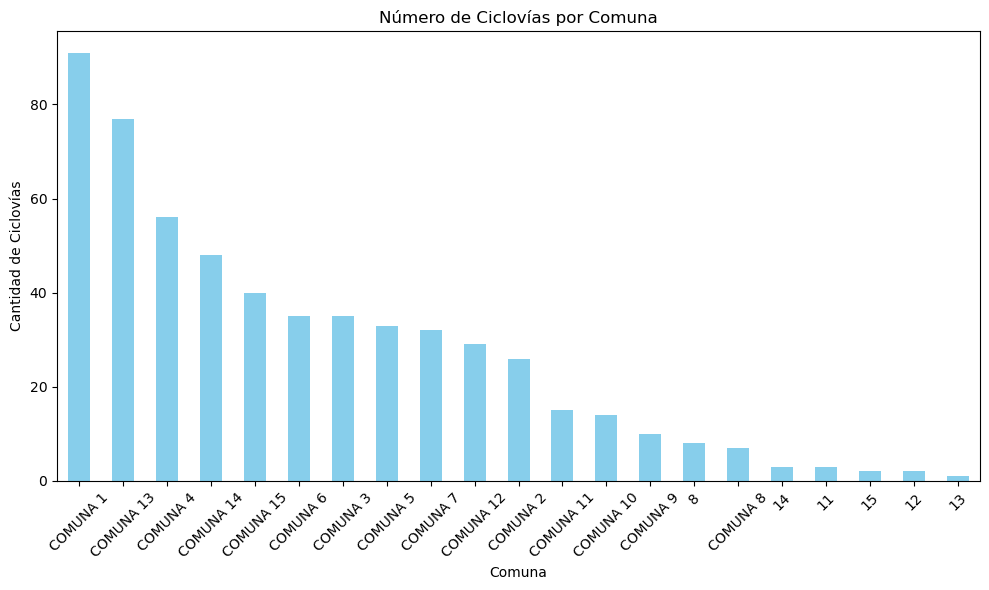

In [6]:
# Visualización: número de ciclovías por comuna
plt.figure(figsize=(10, 6))
comunas_count.plot(kind='bar', color='skyblue')
plt.title('Número de Ciclovías por Comuna')
plt.xlabel('Comuna')
plt.ylabel('Cantidad de Ciclovías')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### longitud total de ciclovías por comuna

In [7]:
# Calcular la longitud total de ciclovías por comuna
data['LONG'] = data['LONG'].str.replace(',', '.').astype(float)  # Convertir a número decimal
longitudes_por_comuna = data.groupby('COMUNA')['LONG'].sum()
print("\nLongitud total de ciclovías por comuna:")
longitudes_por_comuna


Longitud total de ciclovías por comuna:


COMUNA
11            1.348097
12            1.816721
13            0.289871
14            0.602383
15            0.940665
8             3.365953
COMUNA 1     38.171502
COMUNA 10    11.879022
COMUNA 11     9.945741
COMUNA 12    19.230081
COMUNA 13    30.798639
COMUNA 14    30.323269
COMUNA 15    22.415100
COMUNA 2     11.823711
COMUNA 3     20.969688
COMUNA 4     23.967329
COMUNA 5     21.018571
COMUNA 6     11.737816
COMUNA 7     16.356489
COMUNA 8      6.201668
COMUNA 9      9.707209
Name: LONG, dtype: float64

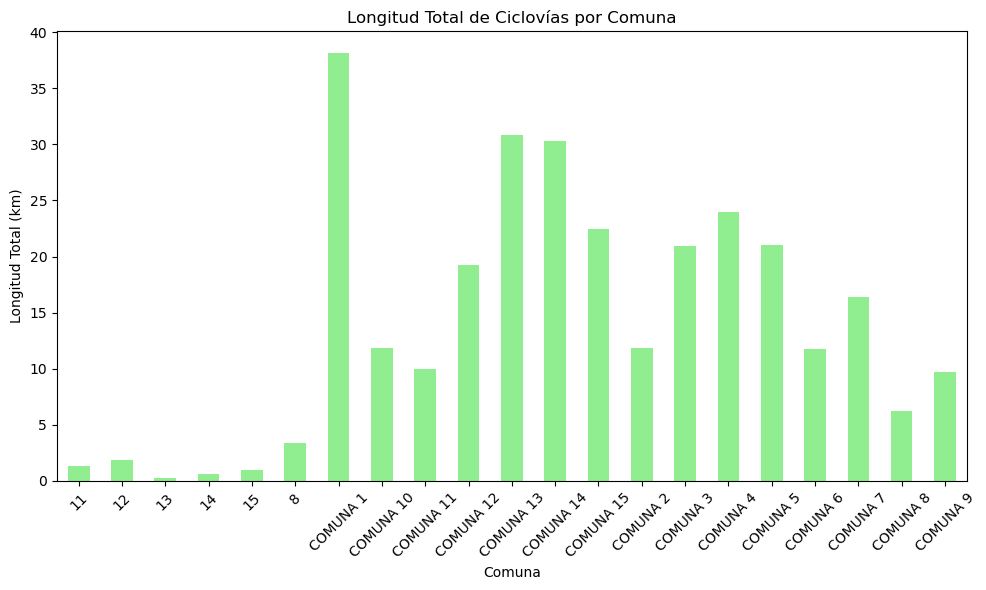

In [8]:
# Visualización: longitud total de ciclovías por comuna
plt.figure(figsize=(10, 6))
longitudes_por_comuna.plot(kind='bar', color='lightgreen')
plt.title('Longitud Total de Ciclovías por Comuna')
plt.xlabel('Comuna')
plt.ylabel('Longitud Total (km)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Distribución de tipos de Ciclovías por Comuna

In [9]:
tipo_ciclovias_por_comuna = data.groupby(['COMUNA', 'TIPOLOGIA']).size().unstack(fill_value=0)
print("\nDistribución de Tipos de Ciclovías por Comuna:")
tipo_ciclovias_por_comuna


Distribución de Tipos de Ciclovías por Comuna:


TIPOLOGIA,BIDIRECCIONA,BIDIRECCIONAL,BIDIRRECCIONAL,CONVENCIONAL,CONVIVENCIA,ESTACIONAMIENTO PARALELO,UNIDIRECCIONAL
COMUNA,,,,,,,
11,0,0,0,3,0,0,0
12,0,0,0,2,0,0,0
13,0,0,0,1,0,0,0
14,0,0,3,0,0,0,0
15,0,0,0,0,0,2,0
8,0,0,0,2,6,0,0
COMUNA 1,1,83,0,0,0,0,7
COMUNA 10,0,13,0,0,0,1,0
COMUNA 11,0,14,0,0,0,1,0


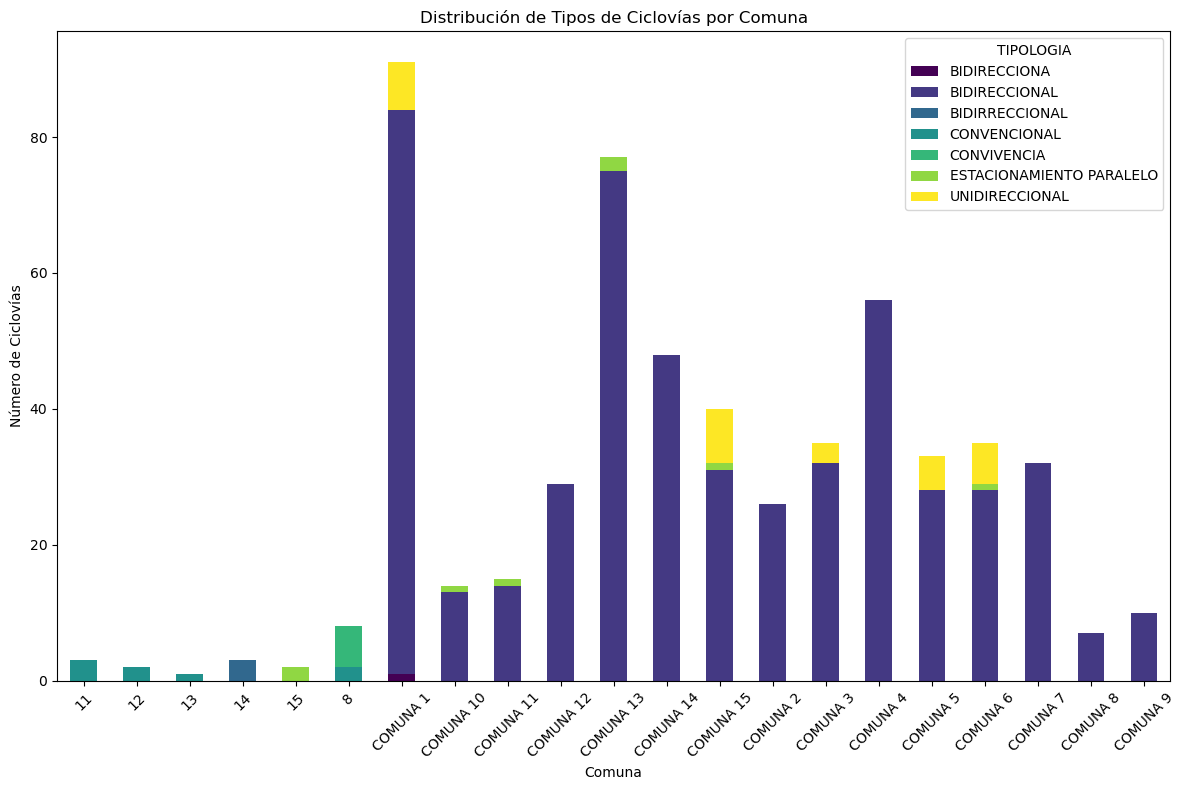

In [10]:
# Visualización: Tipos de Ciclovías por Comuna
tipo_ciclovias_por_comuna.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
plt.title('Distribución de Tipos de Ciclovías por Comuna')
plt.xlabel('Comuna')
plt.ylabel('Número de Ciclovías')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Evolución de la Construcción de Ciclovías a lo Largo del Tiempo

In [11]:
data['FECHA'] = pd.to_numeric(data['FECHA'], errors='coerce')  # Convertir a números
ciclovias_por_anio = data['FECHA'].value_counts().sort_index()
print("\nEvolución de la Construcción de Ciclovías a lo Largo del Tiempo:")
ciclovias_por_anio


Evolución de la Construcción de Ciclovías a lo Largo del Tiempo:


FECHA
2010    70
2011    48
2012    40
2013    29
2014    47
2015    52
2016    16
2017    69
2018    47
2019    62
2020    24
2021    21
2022    41
2023    12
Name: count, dtype: int64

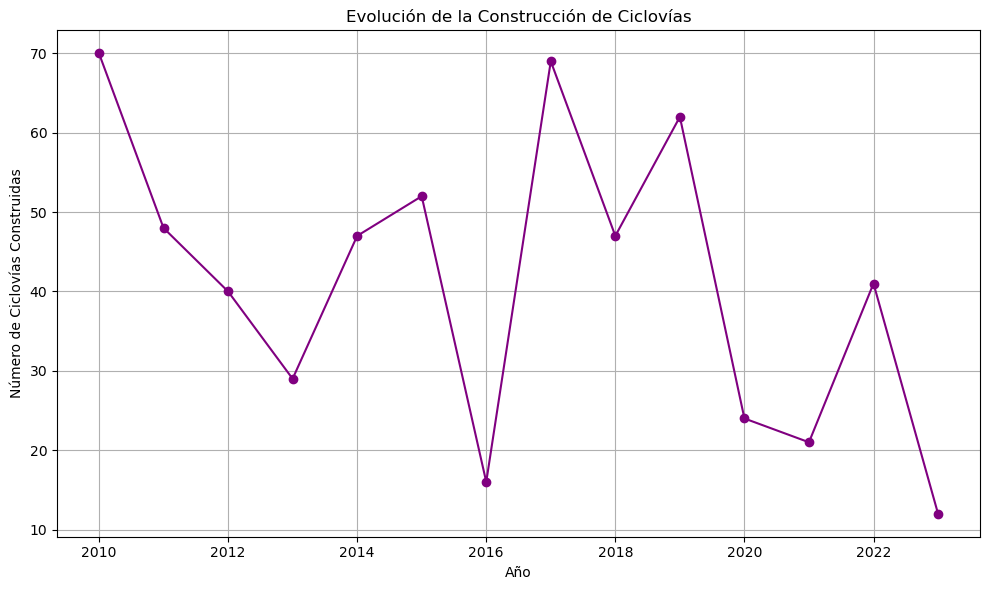

In [12]:
# Visualización: Ciclovías Construidas por Año
plt.figure(figsize=(10, 6))
ciclovias_por_anio.plot(kind='line', marker='o', color='purple')
plt.title('Evolución de la Construcción de Ciclovías')
plt.xlabel('Año')
plt.ylabel('Número de Ciclovías Construidas')
plt.grid(True)
plt.tight_layout()
plt.show()

### Análisis de Ciclovías por Barrio

In [13]:
ciclovias_por_barrio = data['BARRIO'].value_counts()
print("\nNúmero de Ciclovías por Barrio:")
ciclovias_por_barrio


Número de Ciclovías por Barrio:


BARRIO
PALERMO                51
BELGRANO               41
CABALLITO              35
RECOLETA               26
BALVANERA              23
ALMAGRO                22
NU├æEZ                 21
RETIRO                 20
BARRACAS               19
SAN NICOLAS            19
PARQUE CHACABUCO       18
MONSERRAT              17
VILLA CRESPO           17
PARQUE PATRICIOS       16
LA BOCA                15
COLEGIALES             15
FLORES                 14
CONSTITUCION           13
SAAVEDRA               13
SAN CRISTOBAL          12
CHACARITA              12
SAN TELMO              12
BOEDO                  10
POMPEYA                 7
VILLA URQUIZA           7
COGHLAN                 7
VILLA GENERAL MITRE     7
PUERTO MADERO           6
PARQUE AVELLANEDA       5
LA PATERNAL             5
VILLA SOLDATI           5
VILLA SANTA RITA        5
MONTECASTRO             4
FLORESTA                4
AGRONOMIA               4
VILLA LURO              3
LINIERS                 3
VILLA DEVOTO            3
PTO. 

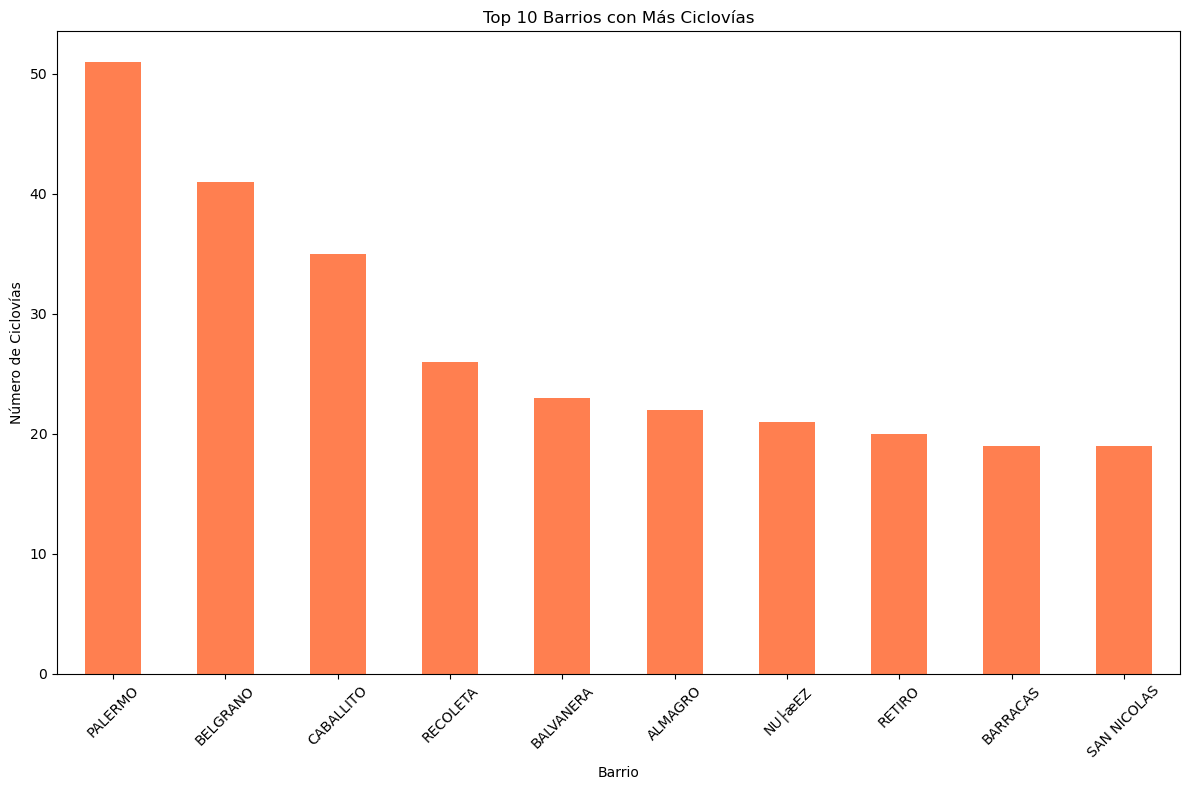

In [14]:
plt.figure(figsize=(12, 8))
ciclovias_por_barrio.head(10).plot(kind='bar', color='coral')
plt.title('Top 10 Barrios con Más Ciclovías')
plt.xlabel('Barrio')
plt.ylabel('Número de Ciclovías')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Longitud Promedio de Ciclovías por Tipo

In [15]:
longitud_promedio_por_tipo = data.groupby('TIPOLOGIA')['LONG'].mean()
print("\nLongitud Promedio de Ciclovías por Tipo:")
longitud_promedio_por_tipo


Longitud Promedio de Ciclovías por Tipo:


TIPOLOGIA
BIDIRECCIONA                0.037071
BIDIRECCIONAL               0.505931
BIDIRRECCIONAL              0.200794
CONVENCIONAL                0.512640
CONVIVENCIA                 0.453254
ESTACIONAMIENTO PARALELO    0.520860
UNIDIRECCIONAL              0.767102
Name: LONG, dtype: float64

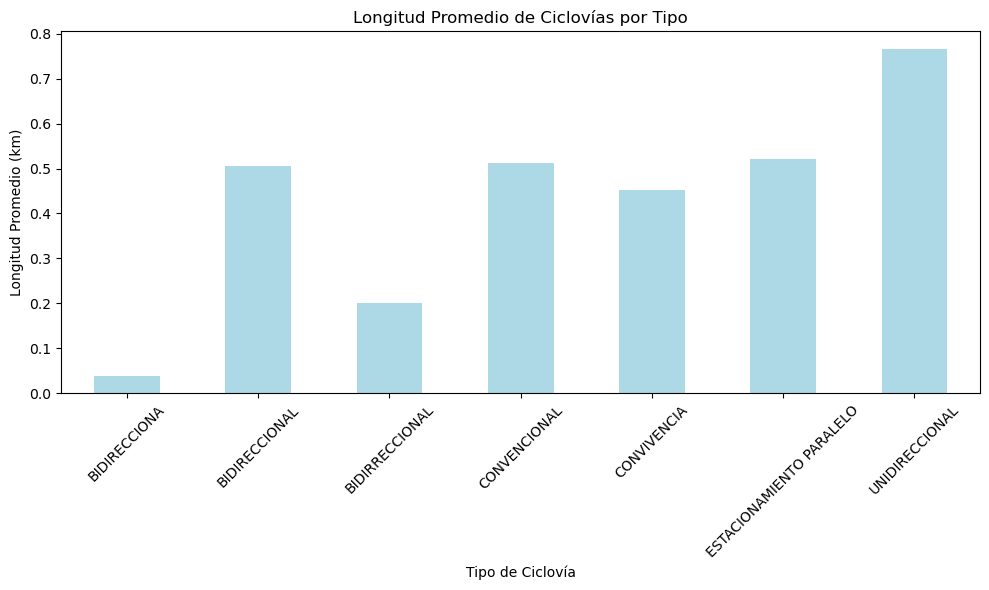

In [16]:
# Visualización: Longitud Promedio de Ciclovías por Tipo
plt.figure(figsize=(10, 6))
longitud_promedio_por_tipo.plot(kind='bar', color='lightblue')
plt.title('Longitud Promedio de Ciclovías por Tipo')
plt.xlabel('Tipo de Ciclovía')
plt.ylabel('Longitud Promedio (km)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Ciclovías por tipo de Calle

In [17]:
ciclovias_por_tipo = data['TIPO_C'].value_counts()
print("Tipos de Calle: ")
ciclovias_por_tipo

Tipos de Calle: 


TIPO_C
CALLE      414
AVENIDA    118
SENDERO     16
PUENTE       3
Name: count, dtype: int64

In [18]:
# Longitud Total de Ciclovías por Tipo de calle
longitud_por_tipo = data.groupby('TIPO_C')['LONG'].sum()
print("Longitud Total de Ciclovías por Tipo de Vía:")
longitud_por_tipo

Longitud Total de Ciclovías por Tipo de Vía:


TIPO_C
AVENIDA     64.910468
CALLE      215.148618
PUENTE       0.818018
SENDERO      4.271113
Name: LONG, dtype: float64

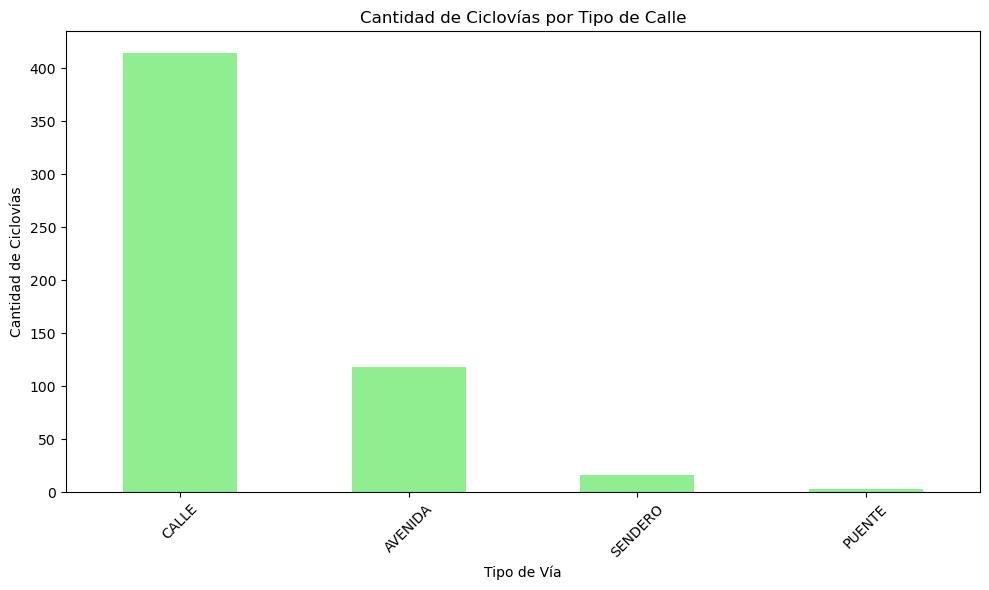

In [19]:
# Visualización: Cantidad de Ciclovías por Tipo de Calle
plt.figure(figsize=(10, 6))
ciclovias_por_tipo.plot(kind='bar', color='lightgreen')
plt.title('Cantidad de Ciclovías por Tipo de Calle')
plt.xlabel('Tipo de Vía')
plt.ylabel('Cantidad de Ciclovías')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Proporción de ciclovías en cada tipo de Calle en comparación con la cantidad total de ese tipo de Calle en Buenos Aires

In [20]:
calles_data = pd.read_excel('Data/callejero.xlsx')

In [21]:
# Contar el número total de cada tipo de calle en Buenos Aires
calles_por_tipo = calles_data['tipo_c'].value_counts()
print("\nCantidad Total de Cada Tipo de Calle en Buenos Aires:")
calles_por_tipo


Cantidad Total de Cada Tipo de Calle en Buenos Aires:


tipo_c
CALLE                      22485
AVENIDA                     6908
PASAJE                      1370
SENDERO                      447
AUTOPISTA                    118
PUENTE                        63
ENLACE AUTOPISTA              62
BOULEVARD                     61
BAJADA AUTOPISTA              61
SUBIDA AUTOPISTA              56
CALLE PEATONAL                40
PASAJE PARTICULAR             34
PASAJE PEATONAL               20
9                              1
CALLE PASAJE PARTICULAR        1
PASAJE PÃšBLICO                1
TÃšNEL                         1
Name: count, dtype: int64

In [22]:
# Calcular la proporción de ciclovías en cada tipo de calle
proporcion_ciclovias = (ciclovias_por_tipo / calles_por_tipo) * 100
proporcion_ciclovias = proporcion_ciclovias.dropna()
print("\nProporción de Ciclovías por Tipo de Vía:")
proporcion_ciclovias


Proporción de Ciclovías por Tipo de Vía:


AVENIDA    1.708164
CALLE      1.841227
PUENTE     4.761905
SENDERO    3.579418
Name: count, dtype: float64

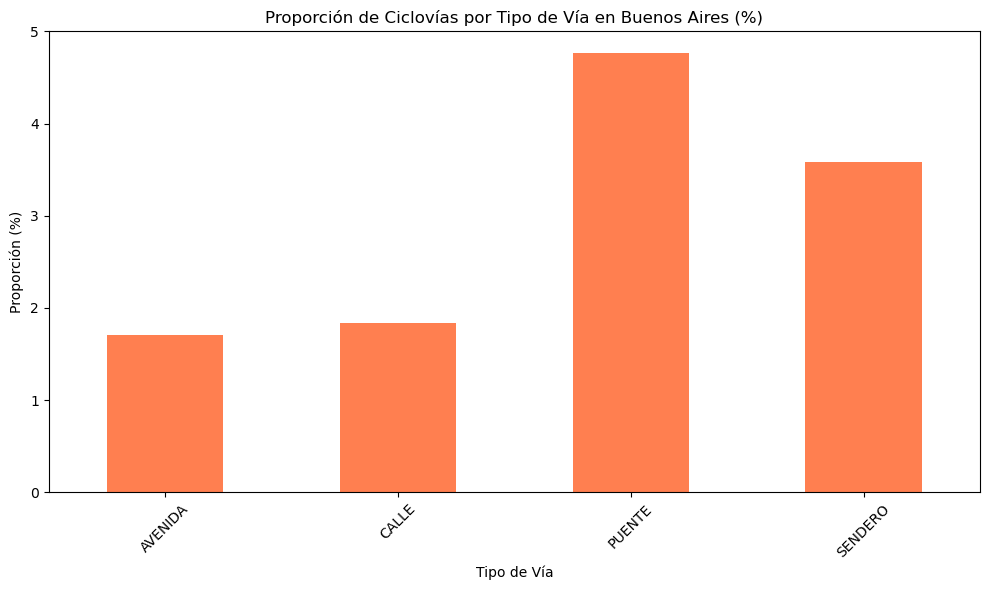

In [23]:
plt.figure(figsize=(10, 6))
proporcion_ciclovias.plot(kind='bar', color='coral')
plt.title('Proporción de Ciclovías por Tipo de Vía en Buenos Aires (%)')
plt.xlabel('Tipo de Vía')
plt.ylabel('Proporción (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()